Resumen estadístico del dataset:
        is_canceled     lead_time  arrival_date_year  \
count  78246.000000  78246.000000       78246.000000   
mean       0.259758     57.836746        2016.190221   
std        0.438504     56.329471           0.686828   
min        0.000000      0.000000        2015.000000   
25%        0.000000      9.000000        2016.000000   
50%        0.000000     39.000000        2016.000000   
75%        1.000000     95.000000        2017.000000   
max        1.000000    200.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              78246.000000               78246.000000   
mean                  26.453697                  15.798213   
std                   13.959935                   8.835329   
min                    1.000000                   1.000000   
25%                   15.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000

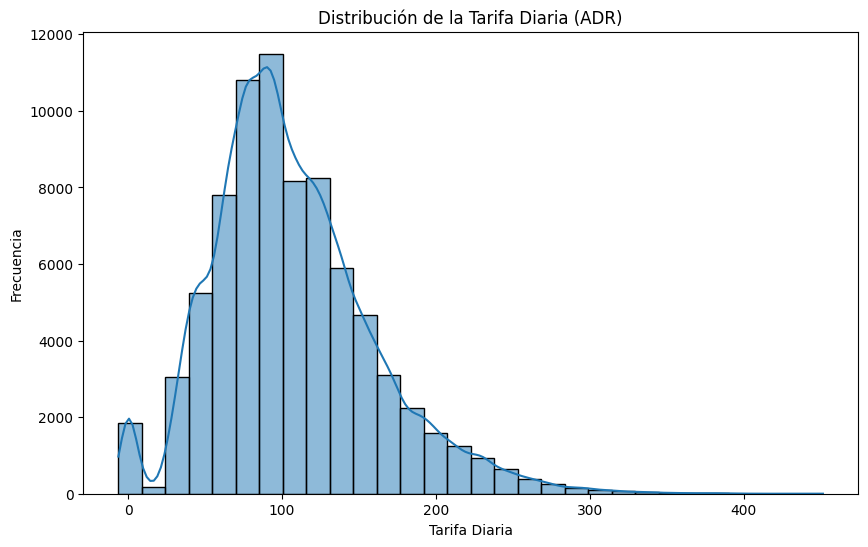

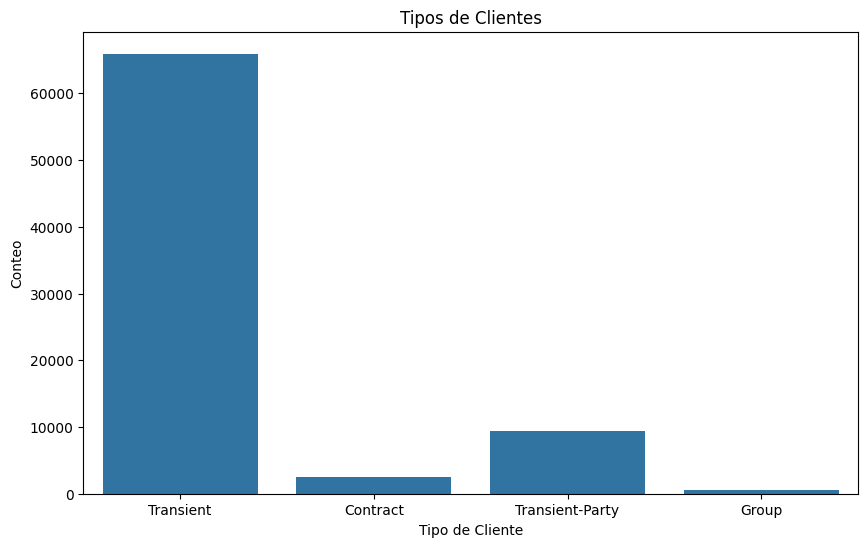

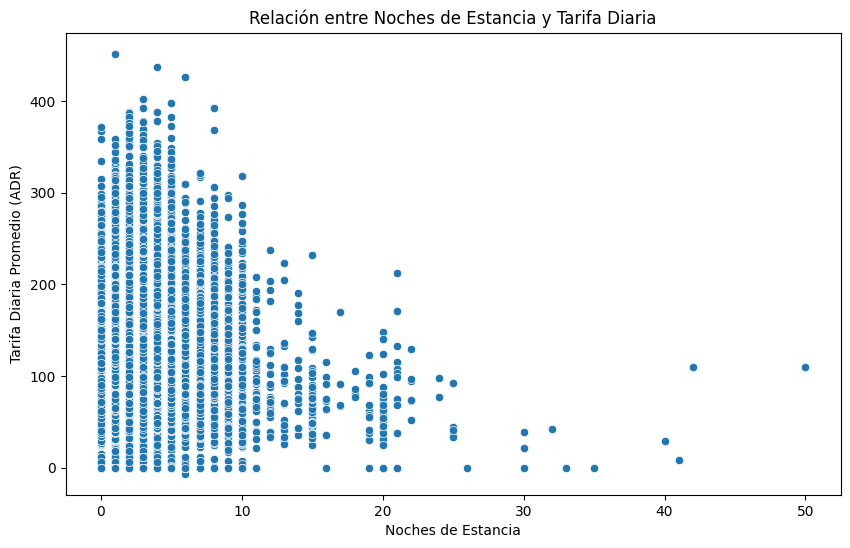

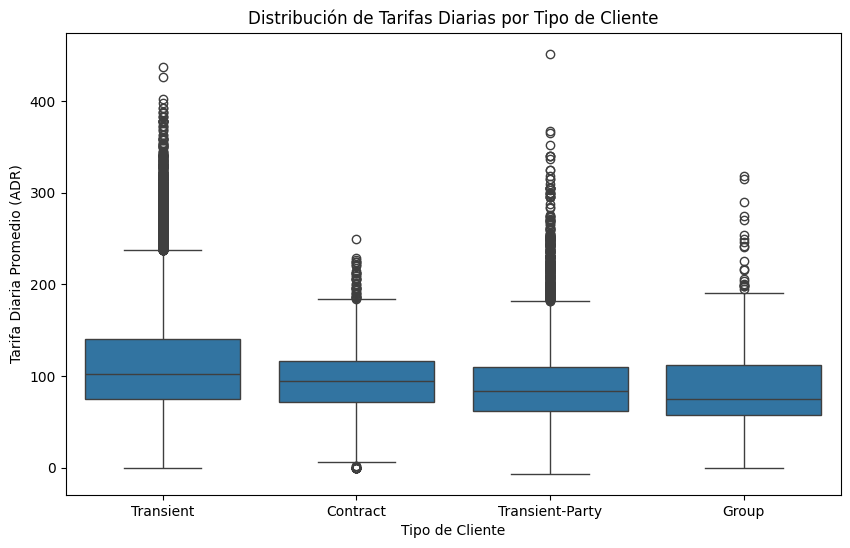

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
file_path = '/content/hotel_bookings.csv'
df = pd.read_csv(file_path)  # read_csv(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

# Detección y eliminación de duplicados
df.drop_duplicates(inplace=True)  # drop_duplicates(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

# Verificación y ajuste de tipos de datos
df['arrival_date_year'] = df['arrival_date_year'].astype(int)
df['is_canceled'] = df['is_canceled'].astype(int)  # astype(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)

# Manejo de valores faltantes
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)  # fillna(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

# Detección de datos anómalos
# Filtra datos según criterios específicos
df = df[(df['lead_time'] <= 200) & (df['adults'] <= 4) & (df['adr'] <= 500)]  # DataFrame indexing(https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

# Resumen estadístico del DataFrame
print("Resumen estadístico del dataset:")
print(df.describe())  # describe(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

# Resumen de 'arrival_date_year'
print("Resumen de arrival_date_year:")
print({
    'min': df['arrival_date_year'].min(),  # min(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.min.html)
    'max': df['arrival_date_year'].max(),  # max(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.max.html)
    'unique_values': df['arrival_date_year'].unique()  #  unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)
})

# Histograma de las tarifas diarias
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], bins=30, kde=True)  # histplot(https://seaborn.pydata.org/generated/seaborn.histplot.html)
plt.title('Distribución de la Tarifa Diaria (ADR)')
plt.xlabel('Tarifa Diaria')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras del tipo de cliente
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', data=df)  # countplot(https://seaborn.pydata.org/generated/seaborn.countplot.html)
plt.title('Tipos de Clientes')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Conteo')
plt.show()

# Gráfico de dispersión: Precio por estancia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stays_in_week_nights', y='adr', data=df)  # scatterplot(https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
plt.title('Relación entre Noches de Estancia y Tarifa Diaria')
plt.xlabel('Noches de Estancia')
plt.ylabel('Tarifa Diaria Promedio (ADR)')
plt.show()

# Gráfico de caja para el precio por tipo de cliente
plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_type', y='adr', data=df)  # boxplot(https://seaborn.pydata.org/generated/seaborn.boxplot.html)
plt.title('Distribución de Tarifas Diarias por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Tarifa Diaria Promedio (ADR)')
plt.show()
